# Trabajo Práctico N° 4 Aprendizaje de Máquina

**COVID-19 Detection in Chest X-Ray Images:** El dataset tiene 600+ imágenes en tres carpetas (COVID-19, normal, neumonía). Desarrollar un extractor de características de las imágenes, y luego entrenar un clasificador.  


### 1.1 Descarga del dataset

In [20]:
dataroot = "dataroot/"
!mkdir dataroot 
!wget -P dataroot https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fvk7h5dg2p-1.zip

mkdir: cannot create directory ‘dataroot’: File exists
--2021-10-27 12:31:53--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fvk7h5dg2p-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.104.91
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.104.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198985388 (190M) [application/octet-stream]
Saving to: ‘dataroot/fvk7h5dg2p-1.zip.2’

fvk7h5dg2p-1.zip.2  100%[===================>] 189.77M  27.9MB/s    in 7.2s    

2021-10-27 12:32:01 (26.2 MB/s) - ‘dataroot/fvk7h5dg2p-1.zip.2’ saved [198985388/198985388]



In [21]:
import zipfile
with zipfile.ZipFile(dataroot+"fvk7h5dg2p-1.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)

In [22]:
!ls dataroot

'COVID-19 cases'    fvk7h5dg2p-1.zip.1	'Normal '
 fvk7h5dg2p-1.zip   fvk7h5dg2p-1.zip.2	 Pneumonia


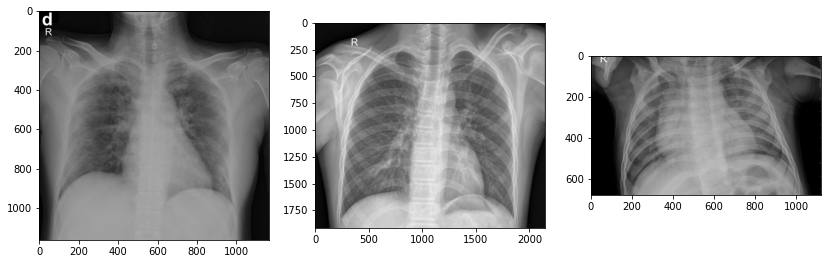

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img_covid     = cv2.imread(dataroot+'COVID-19 cases/1-s2.0-S0929664620300449-gr2_lrg-d.jpg',0)
img_normal    = cv2.imread(dataroot+'Normal /IM-0011-0001-0001.jpeg',0)
img_pneumonia = cv2.imread(dataroot+'Pneumonia/person1650_virus_2854.jpeg',0)

plt.figure(figsize=(14,14))
plt.subplot(1,3,1)
plt.imshow(img_covid,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img_normal,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img_pneumonia,cmap='gray')

### 1.2 Análisis del dataset

In [24]:
!ls dataroot

'COVID-19 cases'    fvk7h5dg2p-1.zip.1	'Normal '
 fvk7h5dg2p-1.zip   fvk7h5dg2p-1.zip.2	 Pneumonia


In [25]:
import pandas as pd
import seaborn as sns
import os

arr = os.listdir(dataroot+'/COVID-19 cases')
arr1 = os.listdir(dataroot+'/Normal ')
arr2 = os.listdir(dataroot+'/Pneumonia')

In [26]:
dataframe = pd.DataFrame()

dataframe1 = pd.DataFrame(arr, columns=['path'])
dataframe1['tipo'] = 'COVID-19 cases'
dataframe2 = pd.DataFrame(arr1, columns=['path'])
dataframe2['tipo'] = 'Normal '
dataframe3 = pd.DataFrame(arr2, columns=['path'])
dataframe3['tipo'] = 'Pneumonia'

dataframe = pd.concat([dataframe1, dataframe2, dataframe3], ignore_index=True)

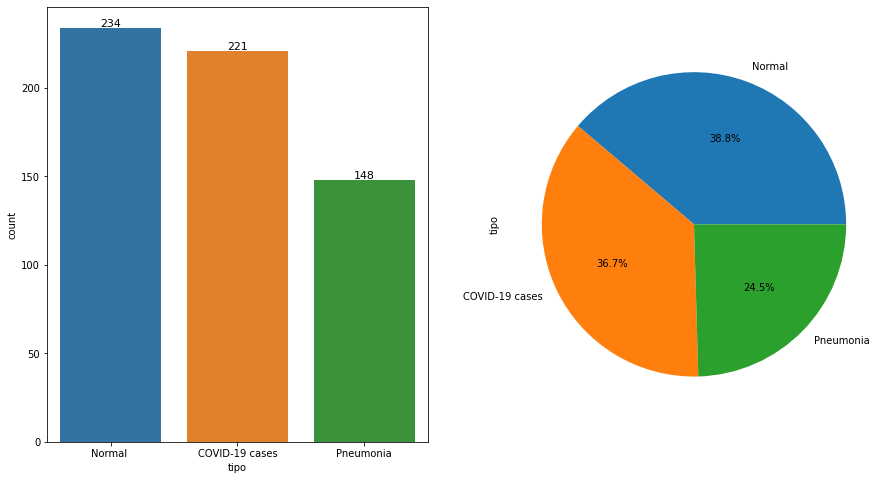

In [27]:
figure, axes = plt.subplots(1, 2,figsize = (15,8))#countplt, ax = plt.subplots(figsize = (30,17))
axes[0] = sns.countplot(ax = axes[0], data=dataframe,x='tipo',order = dataframe.tipo.value_counts().index)
for rect in axes[0].patches:
    axes[0].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

dataframe.tipo.value_counts().plot(kind='pie',autopct="%.1f%%",textprops={'fontsize': 10},ax=axes[1])

### 1.3 División del dataset

In [28]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataframe, test_size=0.25)

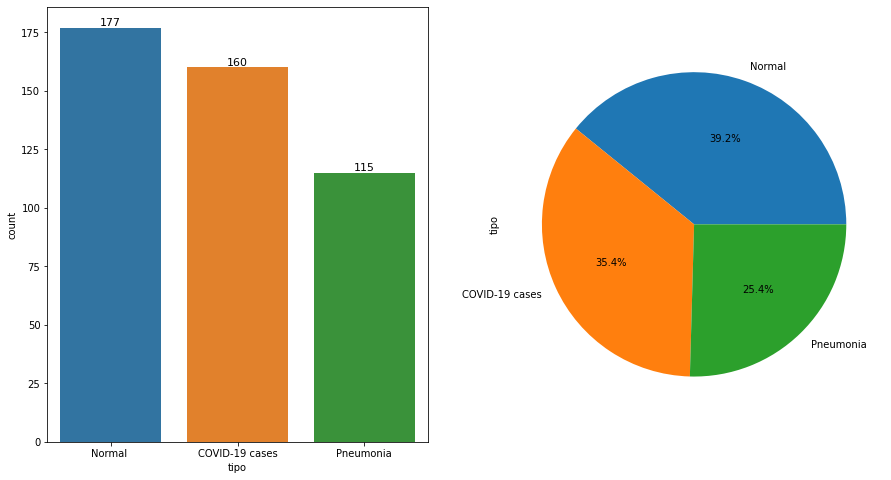

In [29]:
figure, axes = plt.subplots(1, 2,figsize = (15,8))#countplt, ax = plt.subplots(figsize = (30,17))
axes[0] = sns.countplot(ax = axes[0], data=train,x='tipo',order = train.tipo.value_counts().index)
for rect in axes[0].patches:
    axes[0].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

train.tipo.value_counts().plot(kind='pie',autopct="%.1f%%",textprops={'fontsize': 10},ax=axes[1])

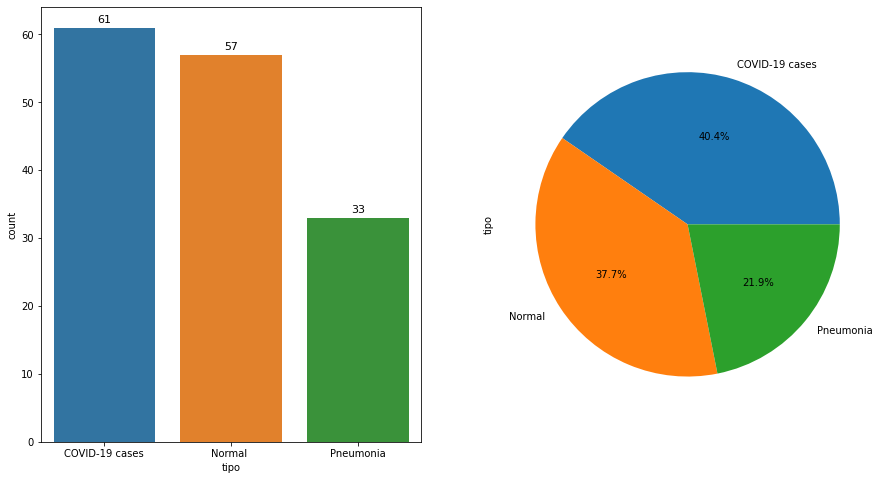

In [30]:
figure, axes = plt.subplots(1, 2,figsize = (15,8))#countplt, ax = plt.subplots(figsize = (30,17))
axes[0] = sns.countplot(ax = axes[0], data=test,x='tipo',order = test.tipo.value_counts().index)
for rect in axes[0].patches:
    axes[0].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

test.tipo.value_counts().plot(kind='pie',autopct="%.1f%%",textprops={'fontsize': 10},ax=axes[1])

### 1.4 Extracción de características con PyRadiomics

In [31]:
!pip install pyradiomics;

In [32]:
import SimpleITK as sitk
from radiomics import featureextractor
import numpy as np

In [33]:
!wget https://raw.githubusercontent.com/AIM-Harvard/pyradiomics/master/examples/exampleSettings/MR_2D_extraction.yaml
!wget https://github.com/AIM-Harvard/pyradiomics/blob/master/examples/exampleSettings/Params.yaml

--2021-10-27 12:32:08--  https://raw.githubusercontent.com/AIM-Harvard/pyradiomics/master/examples/exampleSettings/MR_2D_extraction.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2124 (2.1K) [text/plain]
Saving to: ‘MR_2D_extraction.yaml.2’

MR_2D_extraction.ya 100%[===================>]   2.07K  --.-KB/s    in 0s      

2021-10-27 12:32:09 (28.1 MB/s) - ‘MR_2D_extraction.yaml.2’ saved [2124/2124]

--2021-10-27 12:32:09--  https://github.com/AIM-Harvard/pyradiomics/blob/master/examples/exampleSettings/Params.yaml
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Params.yaml.2’

Params.yaml.2   

In [34]:
# Load up the segmentations, 1 to 10 and extract the features
params = os.path.join(os.getcwd(), '..', 'examples', 'exampleSettings', '/content/MR_2D_extraction.yaml')

### 1.6 Entrenamiento del Modelo

In [35]:
from sklearn.ensemble import RandomForestClassifier

features_train = []
rows_hit_train = []
error = 0
for i,row in train.iterrows():
  #print(dataroot+row['tipo']+'/'+row['path'])
  im = sitk.ReadImage(dataroot+row['tipo']+'/'+row['path'], sitk.sitkFloat32)
  #print(im)
  #im = sitk.Cast(im, sitk.sitkUInt8)
  #select = sitk.VectorIndexSelectionCastImageFilter()
  #im = select.Execute(im, 0, sitk.sitkUInt8)

  im_arr = sitk.GetArrayFromImage(im)
  im_arr2 = np.expand_dims(im_arr, axis=0)
  im3d = sitk.GetImageFromArray(im_arr2)

  th, im_th = cv2.threshold(im_arr, 50, 255, cv2.THRESH_BINARY)

  im_th = np.divide(im_th,255)
  mask_arr_3d = np.expand_dims( im_th, axis=0)
  mask_3d = sitk.GetImageFromArray(mask_arr_3d)

  extractor = featureextractor.RadiomicsFeatureExtractor(params)
  try:
    features= extractor.execute ( im3d, mask_3d )
    rows_hit_train.append(row.tipo)
    features_train.append(features)
  except Exception as e:
    error += 1
    print(e)
    print(row["tipo"])
    print(row["path"])

print(error)
print(i)

Image too small to apply LoG filter, size: [694 453   1]
Image too small to apply LoG filter, size: [568 327   1]
Image too small to apply LoG filter, size: [1100 1100    1]
Image too small to apply LoG filter, size: [1250 1024    1]
Image too small to apply LoG filter, size: [1034  666    1]
Image too small to apply LoG filter, size: [980 844   1]
Image too small to apply LoG filter, size: [881 625   1]
Image too small to apply LoG filter, size: [580 480   1]
Image too small to apply LoG filter, size: [399 411   1]
Image too small to apply LoG filter, size: [863 776   1]
Image too small to apply LoG filter, size: [440 437   1]
Image too small to apply LoG filter, size: [500 224   1]
Image too small to apply LoG filter, size: [808 612   1]
Image too small to apply LoG filter, size: [713 896   1]
Image too small to apply LoG filter, size: [778 507   1]
Image too small to apply LoG filter, size: [1835 1654    1]
Image too small to apply LoG filter, size: [420 280   1]
Image too small to 

No labels found in this mask (i.e. nothing is segmented)!
COVID-19 cases
covid-19-pneumonia-evolution-over-a-week-1-day4.jpg


Image too small to apply LoG filter, size: [396 280   1]
Image too small to apply LoG filter, size: [164 119   1]
Image too small to apply LoG filter, size: [1138 1076    1]
Image too small to apply LoG filter, size: [271 279   1]
Image too small to apply LoG filter, size: [862 721   1]
Image too small to apply LoG filter, size: [832 663   1]
Image too small to apply LoG filter, size: [608 468   1]
Image too small to apply LoG filter, size: [504 296   1]
Image too small to apply LoG filter, size: [640 492   1]
Image too small to apply LoG filter, size: [628 407   1]
Image too small to apply LoG filter, size: [720 532   1]
Image too small to apply LoG filter, size: [480 308   1]
Image too small to apply LoG filter, size: [255 185   1]
Image too small to apply LoG filter, size: [478 477   1]
Image too small to apply LoG filter, size: [1190 1037    1]
Image too small to apply LoG filter, size: [343 308   1]
Image too small to apply LoG filter, size: [669 484   1]
Image too small to apply 

No labels found in this mask (i.e. nothing is segmented)!
COVID-19 cases
nejmc2001573_f1b.jpeg


Image too small to apply LoG filter, size: [1704 1400    1]
Image too small to apply LoG filter, size: [640 499   1]


No labels found in this mask (i.e. nothing is segmented)!
COVID-19 cases
kjr-21-e24-g003-l-b.jpg


Image too small to apply LoG filter, size: [862 733   1]
Image too small to apply LoG filter, size: [512 512   1]
Image too small to apply LoG filter, size: [874 540   1]
Image too small to apply LoG filter, size: [524 220   1]
Image too small to apply LoG filter, size: [628 424   1]
Image too small to apply LoG filter, size: [162 147   1]
Image too small to apply LoG filter, size: [416 224   1]
Image too small to apply LoG filter, size: [209 171   1]
Image too small to apply LoG filter, size: [326 330   1]
Image too small to apply LoG filter, size: [949 810   1]
Image too small to apply LoG filter, size: [742 556   1]
Image too small to apply LoG filter, size: [679 445   1]
Image too small to apply LoG filter, size: [811 584   1]
Image too small to apply LoG filter, size: [1100 1312    1]
Image too small to apply LoG filter, size: [901 555   1]
Image too small to apply LoG filter, size: [776 508   1]
Image too small to apply LoG filter, size: [938 763   1]
Image too small to apply LoG

3
271


In [36]:
df_train = pd.DataFrame([features_train[i] for i, j in enumerate(features_train)])
df_train.drop(columns = df_train.columns[:22], inplace=True)

In [37]:
df_train["target"] = rows_hit_train

In [38]:
df_train[0:10]

,diagnostics_Image-interpolated_Spacing,diagnostics_Image-interpolated_Size,diagnostics_Image-interpolated_Mean,diagnostics_Image-interpolated_Minimum,diagnostics_Image-interpolated_Maximum,diagnostics_Mask-interpolated_Spacing,diagnostics_Mask-interpolated_Size,diagnostics_Mask-interpolated_BoundingBox,diagnostics_Mask-interpolated_VoxelNum,diagnostics_Mask-interpolated_VolumeNum,diagnostics_Mask-interpolated_CenterOfMassIndex,diagnostics_Mask-interpolated_CenterOfMass,diagnostics_Mask-interpolated_Mean,diagnostics_Mask-interpolated_Minimum,diagnostics_Mask-interpolated_Maximum,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,...,wavelet-LL_glrlm_RunVariance,wavelet-LL_glrlm_ShortRunEmphasis,wavelet-LL_glrlm_ShortRunHighGrayLevelEmphasis,wavelet-LL_glrlm_ShortRunLowGrayLevelEmphasis,wavelet-LL_glszm_GrayLevelNonUniformity,wavelet-LL_glszm_GrayLevelNonUniformityNormalized,wavelet-LL_glszm_GrayLevelVariance,wavelet-LL_glszm_HighGrayLevelZoneEmphasis,wavelet-LL_glszm_LargeAreaEmphasis,wavelet-LL_glszm_LargeAreaHighGrayLevelEmphasis,wavelet-LL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet-LL_glszm_LowGrayLevelZoneEmphasis,wavelet-LL_glszm_SizeZoneNonUniformity,wavelet-LL_glszm_SizeZoneNonUniformityNormalized,wavelet-LL_glszm_SmallAreaEmphasis,wavelet-LL_glszm_SmallAreaHighGrayLevelEmphasis,wavelet-LL_glszm_SmallAreaLowGrayLevelEmphasis,wavelet-LL_glszm_ZoneEntropy,wavelet-LL_glszm_ZonePercentage,wavelet-LL_glszm_ZoneVariance,wavelet-LL_gldm_DependenceEntropy,wavelet-LL_gldm_DependenceNonUniformity,wavelet-LL_gldm_DependenceNonUniformityNormalized,wavelet-LL_gldm_DependenceVariance,wavelet-LL_gldm_GrayLevelNonUniformity,wavelet-LL_gldm_GrayLevelVariance,wavelet-LL_gldm_HighGrayLevelEmphasis,wavelet-LL_gldm_LargeDependenceEmphasis,wavelet-LL_gldm_LargeDependenceHighGrayLevelEmphasis,wavelet-LL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LL_gldm_LowGrayLevelEmphasis,wavelet-LL_gldm_SmallDependenceEmphasis,wavelet-LL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LL_ngtdm_Busyness,wavelet-LL_ngtdm_Coarseness,wavelet-LL_ngtdm_Complexity,wavelet-LL_ngtdm_Contrast,wavelet-LL_ngtdm_Strength,target
0,"(2.0, 2.0, 1.0)","(694, 453, 1)",6.084968,-271.406401,315.603672,"(2.0, 2.0, 1.0)","(694, 453, 1)","(6, 0, 0, 676, 453, 1)",264138,71,"(370.47535379233585, 223.68083350369884, 0.0)","(741.4507075846717, 447.86166700739767, 0.0)",37.162645,-111.883559,315.603672,0.767866,1368.801954,1545.8758035495607,1056624.0,1051.057125,12058.1090834888,0.01141192049725238,1056552.0,0.302194,-63.26010394961756,122.53852511868081,31267551383.811504,5.695934356715794,111.67945613854636,2.1177462607243602,315.60367211993974,57.983845466646564,37.1626449479877,45.038734036381,-111.88355931677253,427.48723143671225,44.63695230005547,344.0578677606468,-0.19605451834029117,125070205535.24602,...,0.3182592876287318,0.8680174774208251,3926.1957413704113,0.0009545188583807295,1236.7585062855544,0.010181680151195402,753.3945076783159,4547.303995258049,11.78419185141888,50260.49324519013,0.013206320319459702,0.0011134207675897571,48216.17411026682,0.39694221661713536,0.6541556478087359,2967.8975440414797,0.0007533953732942817,8.722654826871985,0.4598694621750751,7.0556105780651865,8.9

In [44]:
rows_hit_test = []
features_test = []
error = 0
for i,row in test.iterrows():
  #print(dataroot+row['tipo']+'/'+row['path'])
  im = sitk.ReadImage(dataroot+row['tipo']+'/'+row['path'], sitk.sitkFloat32)
  #print(im)
  #im = sitk.Cast(im, sitk.sitkUInt8)
  #select = sitk.VectorIndexSelectionCastImageFilter()
  #im = select.Execute(im, 0, sitk.sitkUInt8)

  im_arr = sitk.GetArrayFromImage(im)
  im_arr2 = np.expand_dims(im_arr, axis=0)
  im3d = sitk.GetImageFromArray(im_arr2)

  th, im_th = cv2.threshold(im_arr, 50, 255, cv2.THRESH_BINARY)

  im_th = np.divide(im_th,255)
  mask_arr_3d = np.expand_dims( im_th, axis=0)
  mask_3d = sitk.GetImageFromArray(mask_arr_3d)

  extractor = featureextractor.RadiomicsFeatureExtractor(params)
  try:
    features= extractor.execute ( im3d, mask_3d )
    rows_hit_test.append(row.tipo)
    features_test.append(features)
  except:
    error += 1
  
print(error)
print(i)

Image too small to apply LoG filter, size: [792 584   1]
Image too small to apply LoG filter, size: [650 564   1]
Image too small to apply LoG filter, size: [501 388   1]
Image too small to apply LoG filter, size: [408 383   1]
Image too small to apply LoG filter, size: [660 384   1]
Image too small to apply LoG filter, size: [258 288   1]
Image too small to apply LoG filter, size: [1174 1170    1]
Image too small to apply LoG filter, size: [1800 1354    1]
Image too small to apply LoG filter, size: [702 706   1]
Image too small to apply LoG filter, size: [1261 1062    1]
Image too small to apply LoG filter, size: [624 420   1]
Image too small to apply LoG filter, size: [1029  857    1]
Image too small to apply LoG filter, size: [128 125   1]
Image too small to apply LoG filter, size: [812 484   1]
Image too small to apply LoG filter, size: [1671 2048    1]
Image too small to apply LoG filter, size: [289 288   1]
Image too small to apply LoG filter, size: [536 440   1]
Image too small 

2
600


In [ ]:
df_test = pd.DataFrame([features_test[i] for i, j in enumerate(features_test)])
df_test.drop(columns = df_test.columns[:22], inplace=True)

In [ ]:
df_test["target"] = rows_hit_test

In [ ]:
df_test[0:10]

In [43]:
df_train.to_csv('train.csv')
df_test.to_csv('test.csv')